In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors 
from sklearn.svm import SVR

In [29]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [8]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

In [9]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model

In [11]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [12]:
knn_model

KNeighborsRegressor()

In [13]:
knn_model.n_neighbors

5

In [14]:
knn_model.metric

'minkowski'

## Tahmin

In [15]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
y_pred

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ,  325.5   ,
        216.5   ,  101.5   ,  982.    ,  886.6666,  590.    ,  901.6666,
        831.6666,  157.5   ,  393.    , 1005.    ,  735.5   ,   97.    ,
        884.4   ,  302.    ,  450.    ,  817.6666,  832.6666,  392.3334,
        528.    ,   81.6   ,  735.    ,  470.    ,  722.5   ,  101.    ,
         90.5   ,   74.6   ,  748.3334,  217.    ,  280.5334, 1044.5   ,
        955.    ,  232.    ,   78.6   ,  529.    ,   77.6   ,  106.5   ,
        516.6666,  593.6666, 1005.    ,  649.1666,  715.    ,  101.5   ,
        134.5   ,  810.    ,  743.    ,  521.3334,  664.3334,  195.    ,
        102.4   ,  728.5   ,  488.    ,  962.5   ,  230.8334, 1040.    ,
        885.    ,  542.    ,  720.4   ,  571.    ,  735.    ,   81.6   ])

In [18]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

## Model Tuning

In [24]:
# el yordamıyla

In [23]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k,"için RMSE değeri",rmse)

k= 1 için RMSE değeri 455.03925390751965
k= 2 için RMSE değeri 415.99629571490965
k= 3 için RMSE değeri 420.6765370082348
k= 4 için RMSE değeri 428.8564674588792
k= 5 için RMSE değeri 426.6570764525201
k= 6 için RMSE değeri 423.5071669008732
k= 7 için RMSE değeri 414.9361222421057
k= 8 için RMSE değeri 413.7094731463598
k= 9 için RMSE değeri 417.84419990871265
k= 10 için RMSE değeri 421.6252180741266


In [25]:
#GridSearchCV

In [26]:
knn_params = {"n_neighbors":np.arange(1,30,1)}

In [27]:
knn = KNeighborsRegressor()

In [28]:
knn_cv_model = GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [31]:
knn_cv_model.best_params_ #optimum parametre

{'n_neighbors': 8}

In [32]:
#final modeli

In [33]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [34]:
y_pred = knn_tuned.predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Destek Vektör Regresyonu (Support Vector Regression)

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

### Model & Tahmin

In [4]:
svr_model = SVR("linear").fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [5]:
svr_model

SVR(kernel='linear')

In [7]:
svr_model.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [8]:
svr_model.predict(X_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [11]:
svr_model.intercept_

array([-80.15196063])

In [12]:
svr_model.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [14]:
#ilkel test hatası
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.0408415795005

### Model Tuning

In [15]:
svr_model = SVR("linear")

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [15]:
svr_model = SVR("linear")

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [16]:
svr_params = {"C":[0.1,0.5,1,3]}

In [18]:
svr_cv_model = GridSearchCV(svr_model,svr_params,cv=5).fit(X_train,y_train)

In [21]:
svr_cv_model.best_params_

{'C': 0.5}

In [23]:
#final modeli 
svr_tuned = SVR("linear", C = 0.5).fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [24]:
y_pred=svr_tuned.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

367.98747616655294

# Yapay Sinir Ağları

In [333]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

### Model & Tahmin

In [334]:
scaler = StandardScaler()

In [335]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [336]:
scaler.fit(X_test)
y_test_scaled = scaler.transform(X_test)

In [337]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [338]:
mlp_model

MLPRegressor()

In [339]:
#ilkel test hatası
y_pred = mlp_model.predict(X_test_scaled)

In [340]:
np.sqrt(mean_squared_error(y_test,y_pred))

660.3779954800793

### Model Tuning

In [342]:
mlp_params = {"alpha":[0.1,0.01,0.02,0.001,0.0001],
             "hidden_layer_sizes": [(10,12), (5,5,10), (25,30,40)]
             }

In [343]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=10,verbose=2,n_jobs=-1).fit(X_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [344]:
mlp_cv_model.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (25, 30, 40)}

In [69]:
#final modeli 

In [73]:
mlp_tuned = MLPRegressor(alpha=0.1,hidden_layer_sizes=(100,100)).fit(X_train_scaled,y_train)

In [74]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred))

360.5819837900549

# Classification and Regression Tree (CART)

In [136]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

In [137]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

### Model & Tahmin

In [138]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 10)    #max_leaf_nodes dal sayısını 

In [139]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

Text(0, 0.5, 'Maaş(Salary)')

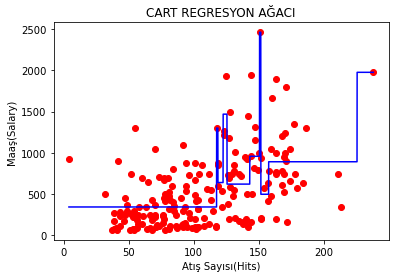

In [140]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train,y_train,color='red')

plt.plot(X_grid, cart_model.predict(X_grid),color='blue')

plt.title("CART REGRESYON AĞACI")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)")

In [141]:
#tek değişkenli tahmin

In [142]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [143]:
y_pred = cart_model.predict(X_test)

In [144]:
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [145]:
# tüm değişkemler

In [152]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

In [153]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train) 

In [154]:
y_pred = cart_model.predict(X_test)

In [155]:
np.sqrt(mean_squared_error(y_test,y_pred))

460.1452624804937

### Model Tuning

In [159]:
cart_model = DecisionTreeRegressor().fit(X_train,y_train) 
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

451.17410565681547

In [160]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    "mae" for the mean absolute error, which minimizes the L1 loss using
    the median of each terminal node, and "poisson" which uses reduction in
    Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

    .. versionadded:: 0.24
        Poisson deviance 

In [161]:
cart_params  = {"max_depth":[2,3,4,5,10,20],
                "min_samples_split":[2,10,5,30,50,100]
               }

In [162]:
cart_model = DecisionTreeRegressor()

In [163]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [164]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [165]:
##final modeli

In [167]:
cart_tuned = DecisionTreeRegressor(max_depth= 4, min_samples_split = 50).fit(X_train,y_train)

In [168]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434

# Random Forest 

In [213]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

### Model & Tahmin

In [214]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [215]:
y_pred = rf_model.predict(X_test)

In [216]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.8191624908484

### Model Tuning

In [182]:
rf_params = {"max_depth":[5,8,10],
            "max_features":[2,5,10],
            "n_estimators":[200,500,1000,2000],
            "min_samples_split":[2,10,80,100]}

In [183]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [184]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [192]:
#final modeli
rf_tuned = RandomForestRegressor(random_state=42,max_depth= 8,max_features= 2,min_samples_split = 2,n_estimators= 200).fit(X_train,y_train)

In [193]:
y_pred = rf_tuned.predict(X_test)

In [194]:
np.sqrt(mean_squared_error(y_test,y_pred))

349.1649379391149

### Değişken Önem Düzeyi

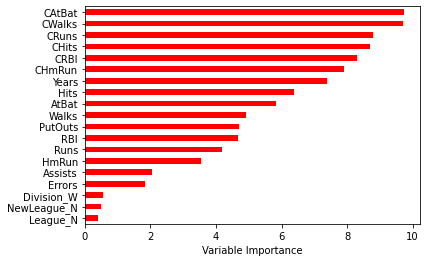

In [218]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh",
                                            color="r",)
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

# Gradient Boosting Machines

In [219]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

### Model & Tahmin

In [224]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [225]:
y_pred = gbm_model.predict(X_test)

In [226]:
np.sqrt(mean_squared_error(y_test,y_pred))

347.69615143773854

### Model Tuning

In [230]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [229]:
gbm_model

GradientBoostingRegressor()

In [232]:
gbm_params = { "learning_rate": [0.001,0.1,0.01],
              "max_depth":[3,5,8],
              "n_estimators":[100,200,500],
              "subsample":[1,0.5,0.8],
              "loss":["ls","lad","quantile"]
}

In [233]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [234]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


In [235]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.8}

In [236]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.01, loss="lad",max_depth=3,n_estimators=500,subsample=0.8).fit(X_train,y_train)

In [237]:
y_pred = gbm_tuned.predict(X_test)

In [238]:
np.sqrt(mean_squared_error(y_test,y_pred))

323.10374042978714

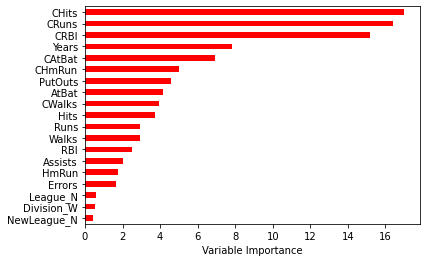

In [239]:
Importance = pd.DataFrame({"Importance":gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh",
                                            color="r",)
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

# XGBoost

In [240]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

### Model & Tahmin

In [241]:
!pip install xgboost

In [242]:
import xgboost 

In [243]:
from xgboost import XGBRegressor

In [244]:
xgb_model = XGBRegressor().fit(X_train,y_train)

In [245]:
y_pred = xgb_model.predict(X_test)

In [247]:
np.sqrt(mean_squared_error(y_test,y_pred))

355.46515176059927

### Model Tuning

In [248]:
xgb_model = XGBRegressor().fit(X_train,y_train)

In [250]:
xgb_params = {"learning_rate": [0.1,0.01,0.7],
              "max_depth":[2,3,4,5,8],
              "n_estimators":[100,200,500,1000],
              "colsample_bytree":[0.4,0.7,1]}

In [251]:
xgb_cv_model = GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [252]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [266]:
xgb_tuned = XGBRegressor(colsample_bytree=0.4,learning_rate=0.5,max_depth=2,n_estimators=1000).fit(X_train,y_train)

In [267]:
y_pred = xgb_tuned.predict(X_test)

In [268]:
np.sqrt(mean_squared_error(y_test,y_pred))

340.73584644949307

# Light GBM

In [269]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

### Model & Tahmin

In [271]:
!pip install lightgbm

In [274]:
from lightgbm import LGBMRegressor

In [275]:
lgbm_model = LGBMRegressor().fit(X_train,y_train)

In [276]:
y_pred = lgbm_model.predict(X_test)

In [278]:
np.sqrt(mean_squared_error(y_test,y_pred))

363.8712087611089

### Model Tuning

In [279]:
lgbm_model = LGBMRegressor().fit(X_train,y_train)

In [280]:
lgbm_params = {"learning_rate":[0.01,0.1,0.5,1],
               "n_estimators":[20,40,100,200,500,1000],
               "max_depth":[1,2,3,4,5,6,7,8,9,10] }

In [281]:
lgbm_cv_model = GridSearchCV(lgbm_model,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [282]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [283]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 20).fit(X_train,y_train)

In [284]:
y_pred = lgbm_tuned.predict(X_test)

In [285]:
np.sqrt(mean_squared_error(y_test,y_pred))

371.5044868943621

# CatBoost

In [286]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

### Model ve Tahmin

In [287]:
!pip install catboost

In [288]:
from catboost import CatBoostRegressor

In [290]:
catb_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 3.36ms	remaining: 3.35s
1:	learn: 431.3923642	total: 7.01ms	remaining: 3.5s
2:	learn: 424.8820360	total: 10.2ms	remaining: 3.39s
3:	learn: 418.2514904	total: 13.2ms	remaining: 3.28s
4:	learn: 412.6394021	total: 16.2ms	remaining: 3.22s
5:	learn: 406.6247020	total: 19.4ms	remaining: 3.22s
6:	learn: 400.5321206	total: 23.2ms	remaining: 3.29s
7:	learn: 394.6683437	total: 26.4ms	remaining: 3.27s
8:	learn: 388.2496484	total: 29.1ms	remaining: 3.2s
9:	learn: 382.9448842	total: 31.8ms	remaining: 3.14s
10:	learn: 377.2600080	total: 35.1ms	remaining: 3.16s
11:	learn: 372.4829606	total: 38.9ms	remaining: 3.2s
12:	learn: 366.6823437	total: 42.1ms	remaining: 3.19s
13:	learn: 362.6076230	total: 46.2ms	remaining: 3.25s
14:	learn: 358.0107745	total: 49.1ms	remaining: 3.22s
15:	learn: 353.2802665	total: 53.4ms	remaining: 3.28s
16:	learn: 348.5646265	total: 56.4ms	remaining: 3.26s
17:	learn: 343.6407912	total: 59.6ms	remaining: 3.25s
18:	learn: 

In [291]:
y_pred = catb_model.predict(X_test)

In [292]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.194631344607

### Model Tuning

In [293]:
catb_params = {"iterations":[200,500,100],
               "learning_rate":[0.01,0.1],
               "depth":[3,6,8]}

In [294]:
catb_cv_model = GridSearchCV(catb_model,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 1.54ms	remaining: 306ms
1:	learn: 404.8723520	total: 2.61ms	remaining: 259ms
2:	learn: 387.4057666	total: 3.52ms	remaining: 231ms
3:	learn: 372.2801584	total: 4.4ms	remaining: 216ms
4:	learn: 358.9204229	total: 5.38ms	remaining: 210ms
5:	learn: 347.0083933	total: 6.33ms	remaining: 205ms
6:	learn: 336.0130818	total: 7.21ms	remaining: 199ms
7:	learn: 324.3923300	total: 8.23ms	remaining: 198ms
8:	learn: 314.8690957	total: 9.2ms	remaining: 195ms
9:	learn: 308.5075563	total: 10.2ms	remaining: 194ms
10:	learn: 298.8587285	total: 11.1ms	remaining: 190ms
11:	learn: 294.7655438	total: 12.1ms	remaining: 189ms
12:	learn: 288.0697862	total: 13ms	remaining: 187ms
13:	learn: 282.6697154	total: 14.1ms	remaining: 188ms
14:	learn: 277.6121667	total: 15.2ms	remaining: 187ms
15:	learn: 273.4383979	total: 16.2ms	remaining: 186ms
16:	learn: 269.1556201	total: 17.2ms	remaining: 186ms
17:	learn: 264.8098704	total: 18.3m

In [295]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [296]:
catb_tuned = CatBoostRegressor(depth=3,iterations=200,learning_rate=0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 1.7ms	remaining: 339ms
1:	learn: 404.8723520	total: 3.69ms	remaining: 365ms
2:	learn: 387.4057666	total: 5.29ms	remaining: 348ms
3:	learn: 372.2801584	total: 6.78ms	remaining: 332ms
4:	learn: 358.9204229	total: 8.21ms	remaining: 320ms
5:	learn: 347.0083933	total: 9.73ms	remaining: 315ms
6:	learn: 336.0130818	total: 10.5ms	remaining: 291ms
7:	learn: 324.3923300	total: 11.4ms	remaining: 273ms
8:	learn: 314.8690957	total: 12.2ms	remaining: 259ms
9:	learn: 308.5075563	total: 13ms	remaining: 248ms
10:	learn: 298.8587285	total: 13.8ms	remaining: 238ms
11:	learn: 294.7655438	total: 14.5ms	remaining: 227ms
12:	learn: 288.0697862	total: 15.3ms	remaining: 221ms
13:	learn: 282.6697154	total: 16.1ms	remaining: 214ms
14:	learn: 277.6121667	total: 16.9ms	remaining: 208ms
15:	learn: 273.4383979	total: 17.6ms	remaining: 202ms
16:	learn: 269.1556201	total: 19.2ms	remaining: 206ms
17:	learn: 264.8098704	total: 20.9ms	remaining: 211ms
18:	learn: 261.6700768	total: 21.8ms	rema

In [297]:
y_pred = catb_tuned.predict(X_test)

In [298]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.3125832615482

# MAKİNE ÖĞRENMESİ GÖREVLERİNİN OTOMATİKLEŞTİRİLMESİ

In [299]:
#her veri seti için incelenmeli
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])

In [326]:
def compML(df, y, alg):
    #train-test ayrımı
    y = df[y]
    X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
    X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme 
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    model_ismi = alg.__name__
    print(model_ismi,"Modeli Test Hatası:",RMSE)

In [327]:
compML(df,"Salary",LGBMRegressor)




LGBMRegressor Modeli Test Hatası: 363.8712087611089


In [329]:
models = [LGBMRegressor,
         XGBRegressor,
         GradientBoostingRegressor,
         RandomForestRegressor,
         DecisionTreeRegressor,
         MLPRegressor,
         KNeighborsRegressor,
         SVR]

In [331]:
for i in models:
    compML(df,"Salary",i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
XGBRegressor Modeli Test Hatası: 355.46515176059927
GradientBoostingRegressor Modeli Test Hatası: 351.05937053319957
RandomForestRegressor Modeli Test Hatası: 346.5262002609608
DecisionTreeRegressor Modeli Test Hatası: 489.03489483995025
MLPRegressor Modeli Test Hatası: 363.57068183125784
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 460.0032657244849
